In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
def Color2Gray(img):
    print(img.shape)
    x = img.shape[0]
    y = img.shape[1]
    img_R = img[0:x, 0:y, 0]
    img_G = img[0:x, 0:y, 1]
    img_B = img[0:x, 0:y, 2]
    img_gray = img_R*0.299 + img_G*0.587 + img_B*0.114
    img_gray = img_gray.astype(np.uint8)
    # print(type(img_gray))
    # print(img_gray)
    return img_gray

def Count(img_gray):
    count = np.zeros(256)
    all = 0
    x = img_gray.shape[0]
    y = img_gray.shape[1]
    for i in range(x):
        for j in range(y):
            count[img_gray[i][j]] += 1
            all += 1
    print(count.shape)
    return count

In [10]:
def S(num):
    if num <= 0:
        return 0
    else:
        return num

def GVAT_eq1(count):
    ans = np.zeros(256)
    for j in range(256):
        imax = 0
        kmax = 0
        for i in range(j):
            if count[i] > imax:
                imax = count[i]
        for k in range(j, 256):
            if count[k] > kmax:
                kmax = count[k]
        ans[j] = (S(imax - count[j]) + S(kmax - count[j])) / 2
        # print(j, imax, kmax, ans[j])
    return ans


def GVAT_eq2(count):
    ans = np.zeros(256)
    for j in range(256):
        imax = 0
        kmax = 0
        for i in range(j):
            if count[i] > imax:
                imax = count[i]
        for k in range(j, 256):
            if count[k] > kmax:
                kmax = count[k]
        ans[j] = math.sqrt(S(imax - count[j]) * S(kmax - count[j]))
        # print(j, imax, kmax, ans[j])
    return ans

In [11]:
def Thresholding(img_gray, threshold):
    x = img_gray.shape[0]
    y = img_gray.shape[1]
    img_th = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            if img_gray[i][j] >= threshold:
                img_th[i][j] = 255
            else:
                img_th[i][j] = 0
    return img_th

(168, 299, 3)
(256,)


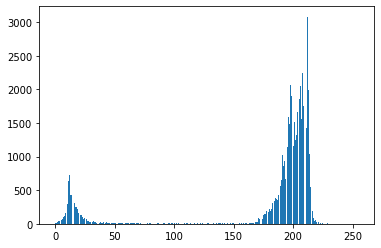

In [20]:
# img = cv2.imread('lena_std.tif')
img = cv2.imread('test4.jpg')
# print(img.shape)
img_gray = Color2Gray(img)

# cv2.imshow('img', img)
# cv2.imshow('img_gray', img_gray)
cv2.imwrite('img_gray.png', img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

count = Count(img_gray)
x = range(256)
plt.bar(x, count)
plt.savefig('his.png')
plt.show()
# print(count)
eq1_A = GVAT_eq1(count)
eq2_A = GVAT_eq2(count)
# print(eq1_A)



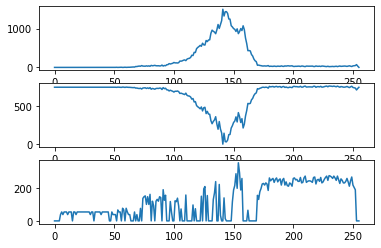

In [16]:
x = range(256)


plt.figure(1)
plt.subplot(3, 1, 1)
plt.plot(x, count)
plt.subplot(3, 1, 2)
plt.plot(x, eq1_A)
plt.subplot(3, 1, 3)
plt.plot(x, eq2_A)
plt.savefig('matplot.png')
plt.show()


In [17]:
eq2_M = np.argmax(eq2_A)
print(eq2_M)
img_th = Thresholding(img_gray, eq2_M)

# cv2.imshow('img', img)
# cv2.imshow('img_gray', img_gray)
# cv2.imshow('img_th', img_th)
cv2.imwrite('img_th.png', img_th)
cv2.waitKey(0)
cv2.destroyAllWindows()

154
